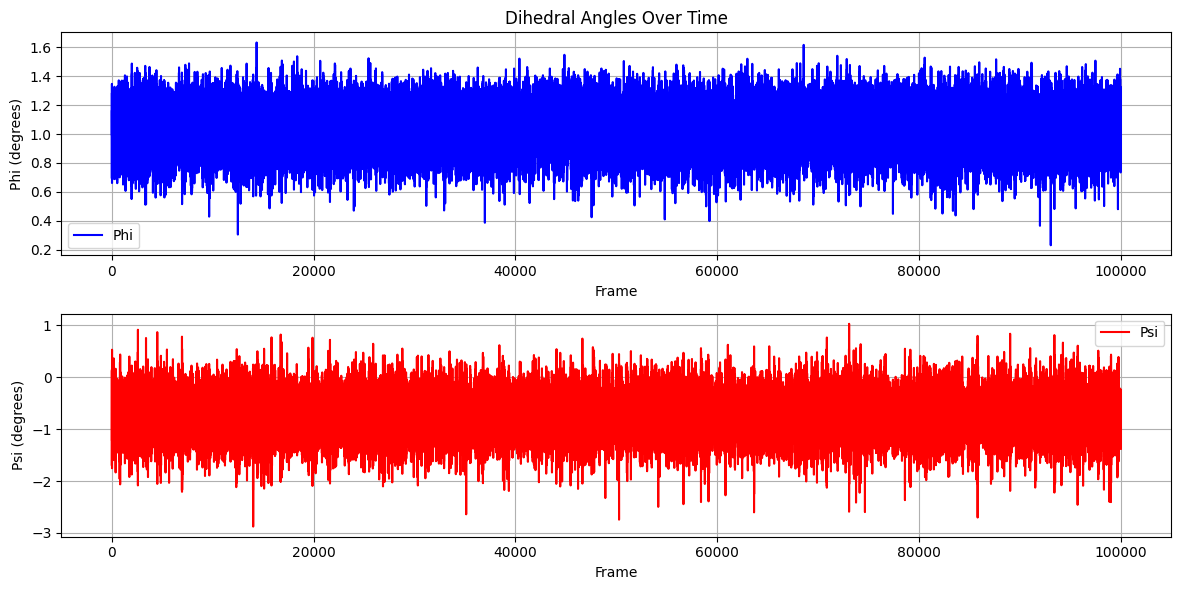

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the COLVAR file
# Adjust the filename and delimiter as necessary
data = np.loadtxt('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/B/COLVAR', comments=['#', '@'])

frames = data[:, 0]  # Frame numbers
phi = data[:, 1]     # Phi dihedral
psi = data[:, 2]     # Psi dihedral

# Plotting
plt.figure(figsize=(12, 6))

# Plot Phi
plt.subplot(2, 1, 1)
plt.plot(frames, phi, label='Phi', color='blue')
plt.title('Dihedral Angles Over Time')
plt.ylabel('Phi (degrees)')
plt.xlabel('Frame')
plt.grid()
plt.legend()

# Plot Psi
plt.subplot(2, 1, 2)
plt.plot(frames, psi, label='Psi', color='red')
plt.ylabel('Psi (degrees)')
plt.xlabel('Frame')
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('dihedrals_plot_B.png')
plt.show()


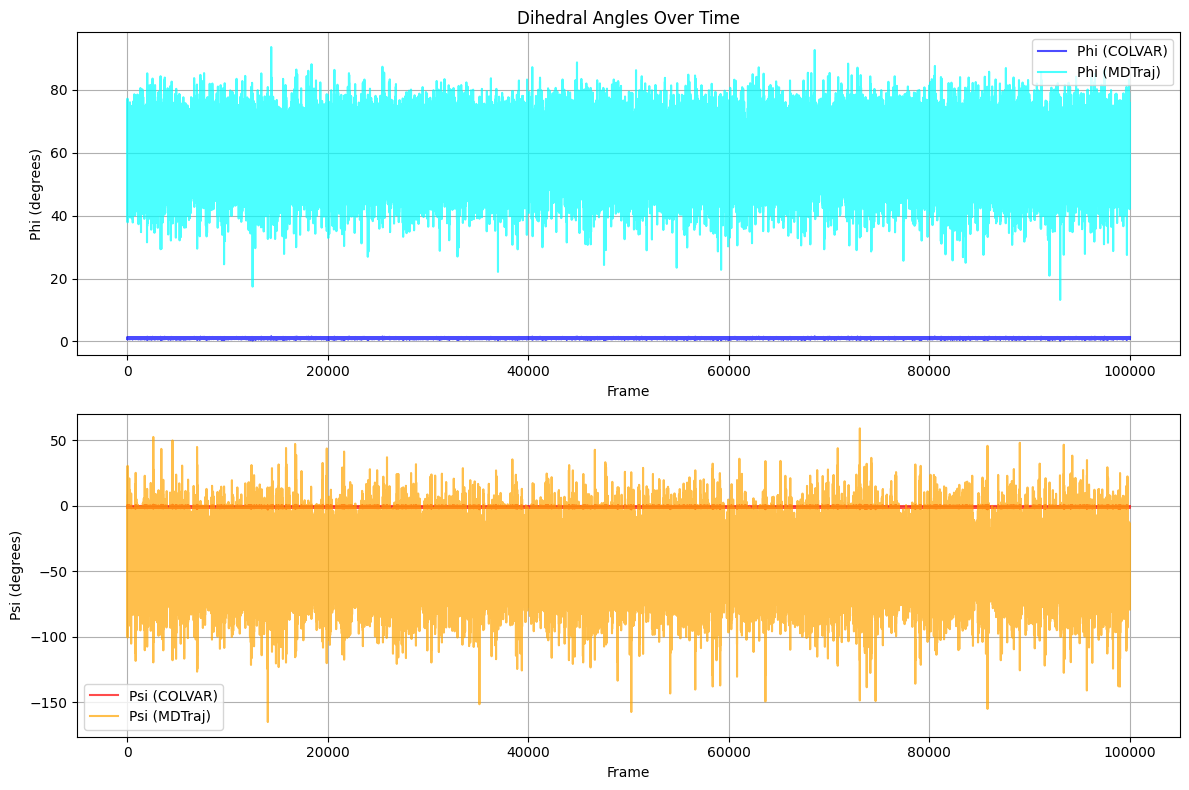

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# Load the XTC file and the corresponding PDB file
xtc_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/B/traj_comp.xtc'
pdb_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/B/dialaB.pdb'

# Load the trajectory
traj = md.load(xtc_file, top=pdb_file)

# Select indices for phi and psi dihedrals
# Ensure the indices match your specific structure
phi_indices = [(5,7,9,15)]  # C (ACE) - N (ALA) - CA (ALA) - C (ALA)
psi_indices = [(7,9,15,17)]  # N (ALA) - CA (ALA) - C (ALA) - N (NME)

# Compute the dihedrals
phi_dihedrals = md.compute_phi(traj, phi_indices)[1]  # Returns angles in radians
psi_dihedrals = md.compute_psi(traj, psi_indices)[1]   # Returns angles in radians

# Convert radians to degrees
phi_dihedrals_deg = np.degrees(phi_dihedrals)
psi_dihedrals_deg = np.degrees(psi_dihedrals)

# Load the COLVAR file

colvar_data = np.loadtxt('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/B/COLVAR', comments=['#', '@'])
frames_colvar = colvar_data[:, 0]
phi_colvar = colvar_data[:, 1]
psi_colvar = colvar_data[:, 2]

# Plotting
plt.figure(figsize=(12, 8))

# Plot Phi
plt.subplot(2, 1, 1)
plt.plot(frames_colvar, phi_colvar, label='Phi (COLVAR)', color='blue', alpha=0.7)
plt.plot(phi_dihedrals_deg, label='Phi (MDTraj)', color='cyan', alpha=0.7)
plt.title('Dihedral Angles Over Time')
plt.ylabel('Phi (degrees)')
plt.xlabel('Frame')
plt.grid()
plt.legend()

# Plot Psi
plt.subplot(2, 1, 2)
plt.plot(frames_colvar, psi_colvar, label='Psi (COLVAR)', color='red', alpha=0.7)
plt.plot(psi_dihedrals_deg, label='Psi (MDTraj)', color='orange', alpha=0.7)
plt.ylabel('Psi (degrees)')
plt.xlabel('Frame')
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('dihedrals_comparison_plot_B.png')
plt.show()


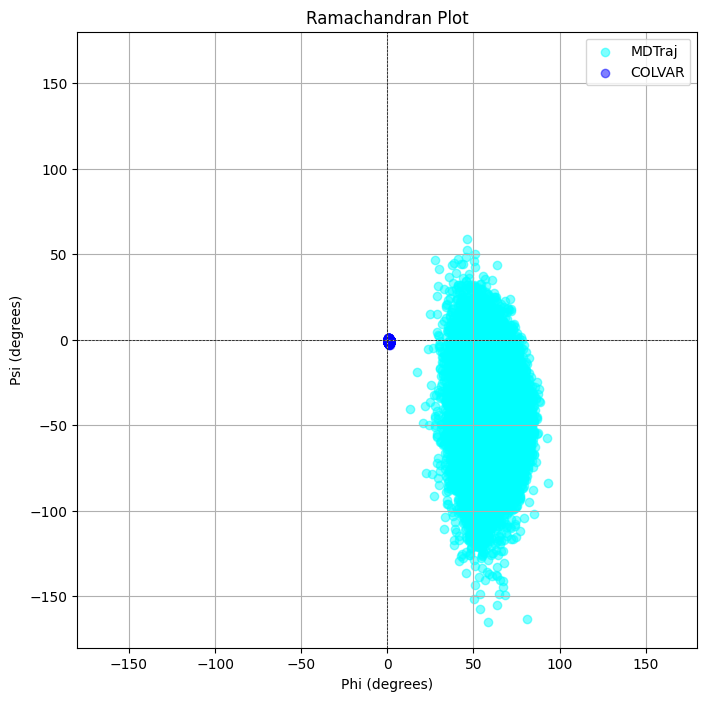

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# Load the XTC file and the corresponding PDB file
xtc_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/B/traj_comp.xtc'
pdb_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/B/dialaB.pdb'

# Load the trajectory
traj = md.load(xtc_file, top=pdb_file)

# Select indices for phi and psi dihedrals
phi_indices = [(5,7,9,15)]  # C (ACE) - N (ALA) - CA (ALA) - C (ALA)
psi_indices = [(7,9,15,17)]  # N (ALA) - CA (ALA) - C (ALA) - N (NME)

# Compute the dihedrals
phi_dihedrals = md.compute_phi(traj, phi_indices)[1]  # Returns angles in radians
psi_dihedrals = md.compute_psi(traj, psi_indices)[1]   # Returns angles in radians

# Convert radians to degrees
phi_dihedrals_deg = np.degrees(phi_dihedrals)
psi_dihedrals_deg = np.degrees(psi_dihedrals)

# Load the COLVAR file
colvar_data = np.loadtxt('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/B/COLVAR', comments=['#', '@'])
phi_colvar = colvar_data[:, 1]
psi_colvar = colvar_data[:, 2]

# Plotting
plt.figure(figsize=(8, 8))

# Scatter plot of phi vs psi from MDTraj
plt.scatter(phi_dihedrals_deg, psi_dihedrals_deg, label='MDTraj', color='cyan', alpha=0.5)

# Scatter plot of phi vs psi from COLVAR
plt.scatter(phi_colvar, psi_colvar, label='COLVAR', color='blue', alpha=0.5)

# Formatting the plot
plt.title('Ramachandran Plot')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.savefig('ramachandran_plot_B.png')
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# Load the XTC file and the corresponding PDB file
xtc_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/B/traj_comp.xtc'
pdb_file = '/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/B/dialaB.pdb'

# Load the trajectory
traj = md.load(xtc_file, top=pdb_file)

# Compute the dihedrals
phi_dihedrals = md.compute_phi(traj, phi_indices)[1]  # Returns angles in radians
psi_dihedrals = md.compute_psi(traj, psi_indices)[1]   # Returns angles in radians

# Convert radians to degrees
phi_dihedrals_deg = np.degrees(phi_dihedrals)
psi_dihedrals_deg = np.degrees(psi_dihedrals)

# Compute standard deviations
phi_std = np.std(phi_dihedrals_deg)
psi_std = np.std(psi_dihedrals_deg)

# Print the results
print(f'Standard Deviation of Phi: {phi_std:.2f} degrees')
print(f'Standard Deviation of Psi: {psi_std:.2f} degrees')

# Load the COLVAR file (optional if you also want to compute standard deviations from COLVAR)
colvar_data = np.loadtxt('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/B/COLVAR', comments=['#', '@'])
phi_colvar = colvar_data[:, 1]
psi_colvar = colvar_data[:, 2]

# Compute standard deviations from COLVAR
phi_colvar_std = np.std(phi_colvar)
psi_colvar_std = np.std(psi_colvar)

# Print the results from COLVAR
print(f'Standard Deviation of Phi (COLVAR): {phi_colvar_std:.2f} degrees')
print(f'Standard Deviation of Psi (COLVAR): {psi_colvar_std:.2f} degrees')


Standard Deviation of Phi: 7.58 degrees
Standard Deviation of Psi: 19.74 degrees
Standard Deviation of Phi (COLVAR): 0.13 degrees
Standard Deviation of Psi (COLVAR): 0.34 degrees


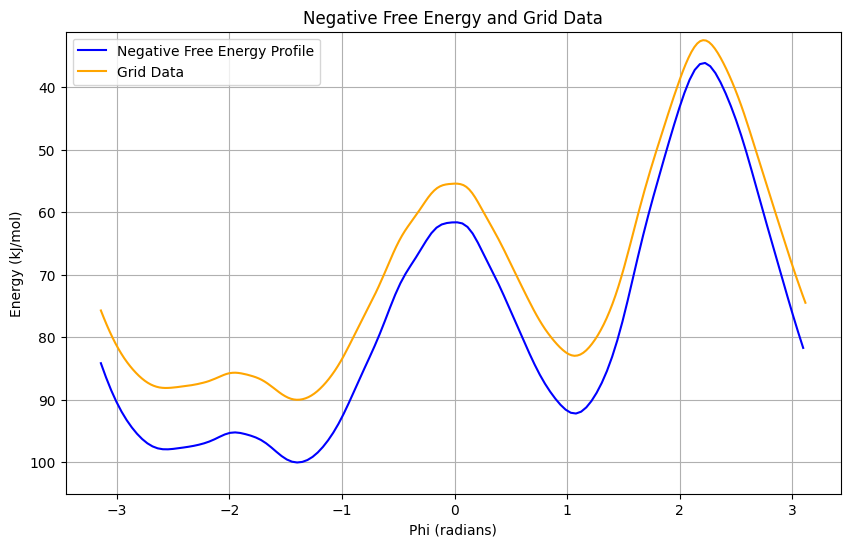

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fes_data = np.loadtxt('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/Lugano/B/fes.dat')
phi_fes = fes_data[:, 0]
free_energy = fes_data[:, 1]

grid_data = np.loadtxt('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/Lugano/B/A.grid.dat')
phi_grid = grid_data[:, 0]  
energy_grid = grid_data[:, 1]  

# Plotting the negative of the free energy
plt.figure(figsize=(10, 6))
plt.plot(phi_fes, -free_energy, label='Negative Free Energy Profile', color='blue')  # Negate the free energy
plt.xlabel('Phi (radians)')
plt.ylabel('Energy (kJ/mol)')
plt.title('Negative Free Energy and Grid Data')
plt.grid()
plt.legend()

plt.plot(phi_grid, energy_grid, label='Grid Data', color='orange')  # Adjust color as needed
plt.legend()  

plt.ylim(np.max(-free_energy) + 5, np.min(-free_energy) - 5)

# Save and show the plot
plt.savefig('combined_plot.png')
plt.show()


In [16]:
min_fes = np.min(-free_energy)
max_fes = np.max(-free_energy)
min_grid = np.min(energy_grid)
max_grid = np.max(energy_grid)
scale_factor = (max_fes - min_fes) / (max_grid - min_grid)
scaled_grid_data = energy_grid * scale_factor
print(scaled_grid_data) #multiply this while plotting

[ 84.14938004  85.45893398  86.70488054  87.88330708  88.9861886
  90.01453205  90.96377719  91.83644276  92.64538116  93.3767047
  94.05229402  94.67168768  95.23865579  95.75909835  96.22518279
  96.63929623  96.99384252  97.29123116  97.52605939  97.70448025
  97.83188572  97.89985175  97.92974414  97.9202388   97.89084396
  97.84091481  97.78301641  97.71699218  97.64853491  97.58034954
  97.51159122  97.43461463  97.34250406  97.24129962  97.1298937
  97.00010326  96.86010326  96.69434513  96.5018363   96.28849426
  96.06063575  95.83381439  95.61842349  95.4311421   95.29982005
  95.23024332  95.21367786  95.2549036   95.3313649   95.4349059
  95.55663658  95.70006641  95.85067758  96.0255884   96.23416946
  96.48559373  96.78453167  97.1258227   97.4992464   97.89644462
  98.29645328  98.69857196  99.06537572  99.38266452  99.64889099
  99.84798109  99.9746499  100.0299039  100.01069666  99.92489375
  99.77124816  99.55626745  99.27327593  98.92506213  98.5153272
  98.04227228  